In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
crash = pd.read_csv('full_data_for_models.csv')
crash.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [10]:
X = crash.drop(['Injury_Target', 'Crash Date/Time'], axis=1)
y = crash['Injury_Target']

In [11]:
crash.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=2, step=1) 

In [15]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=2)

In [17]:
from sklearn.metrics import accuracy_score

# Transform the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model with the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features: ", accuracy)

Model Accuracy with Selected Features:  0.7719437558103501


# Extract Features

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy with Selected Features: ", accuracy)

# Save the selected features for future use
selected_features_list = selected_features.tolist()
print("Selected Features List: ", selected_features_list)


Final Model Accuracy with Selected Features:  0.7719437558103501
Selected Features List:  ['Distance', 'Vehicle Age']


# Create New Dataframe Subset

In [11]:
crash_data2 = crash[['Injury_Target', 'Distance', 'Vehicle Age']]
crash_data2.head()

,Injury_Target,Distance,Vehicle Age
0,0,14.88,7
1,0,14.88,22
2,0,1.64,8
3,0,1.64,5
4,2,10.48,13


In [12]:
X = crash_data2.drop('Injury_Target', axis=1)
y = crash_data2['Injury_Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train, y_train)

# Predict on the test data
y_pred = knn5.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     28214
           1       0.10      0.01      0.02      3553
           2       0.06      0.00      0.01      2364
           3       0.00      0.00      0.00       254
           4       0.00      0.00      0.00        36

    accuracy                           0.81     34421
   macro avg       0.20      0.20      0.18     34421
weighted avg       0.69      0.81      0.74     34421

Confusion Matrix:
[[27753   352   108     1     0]
 [ 3495    41    17     0     0]
 [ 2333    23     8     0     0]
 [  250     4     0     0     0]
 [   35     1     0     0     0]]


/Users/louise/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/louise/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/louise/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


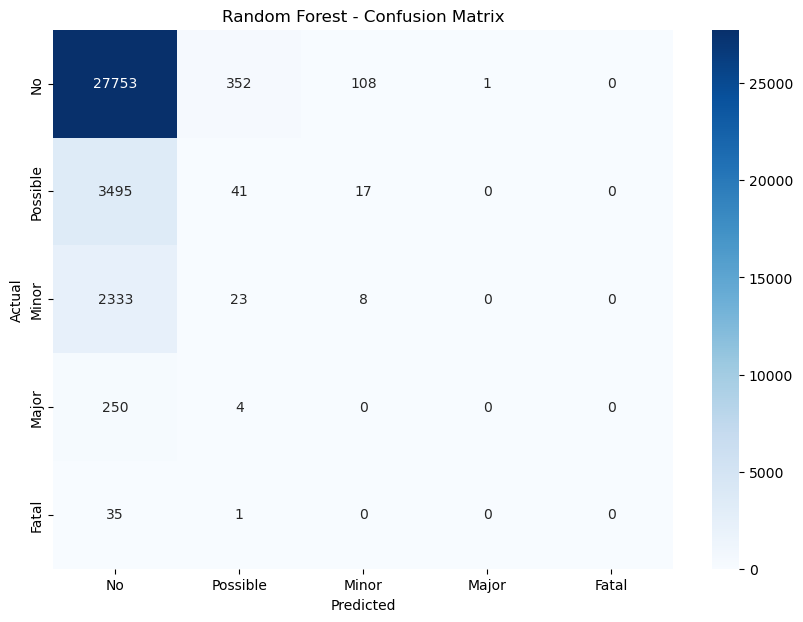

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'], yticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

ROC AUC Score (One-vs-Rest): 0.50
ROC AUC Score (One-vs-One): 0.50


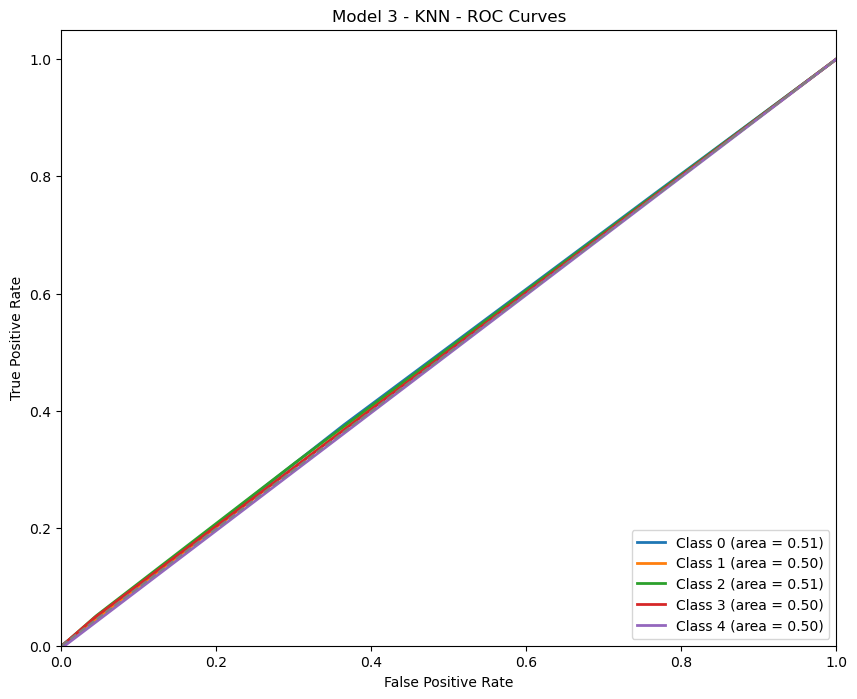

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

y_prob = knn5.predict_proba(X_test)

# Calculate the ROC AUC score with multi_class parameter
roc_auc_ovr = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_test_binarized, y_prob, multi_class='ovo')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc_ovr:.2f}')
print(f'ROC AUC Score (One-vs-One): {roc_auc_ovo:.2f}')

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 3 - KNN - ROC Curves')
plt.legend(loc="lower right")
plt.show()